In [2]:
import pandas as pd
import numpy as np

import os, glob
import pandas as pd
import numpy as np
%matplotlib inline
#%matplotlib notebook
import seaborn as sns
sns.reset_orig()
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import pdb
import requests

import sys

from importlib import reload
from pchipOceanSlices import PchipOceanSlices

import visualizeProfs as vp
#reload(visualizeProfs)

/home/tyler/anaconda3/envs/AR/lib/python3.6/site-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/home/tyler/anaconda3/envs/AR/lib/python3.6/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


In [4]:
coord = {}
coord['lat'] = 0
coord['long'] = 59.5
shape = vp.construct_box(coord, 20, 20)

In [5]:
ids = ['5901721_24',
'3900105_196',
'4900595_140',
'4900593_152',
'4900883_92',
'5901898_42',
'6900453_3',
'6900453_5',
'6900453_6',
'3900495_188',
'3900495_189',
'3900495_190',
'4901139_74',
'2901211_144',
'2900784_254',
'2901709_19',
'1901218_88',
'4901787_0',
'6902566_44',
'4901787_6',
'6901002_100',
'2902100_104',
'6901002_102',
'6901541_103',
'2901703_157',
'2901765_1',
'4901750_125',
'4902382_4',
'4901285_208',
'4901285_209',
'4902107_54',
'6901448_149',
'6901740_126',
'5901884_302',
'4901466_156',
'4901462_174',
'4901798_110',
'4901798_112',
'4902391_58',
'6902661_118',
'4901824_91',
'4902457_2',
'5904485_280',
'5904485_284',]

In [6]:
startDate='2007-6-15'
endDate='2007-7-31'
presRange='[15,35]'

#profiles = get_selection_profiles(startDate, endDate, shape, presRange)
profiles = vp.get_profiles_by_id(str(ids).replace(' ',''), None, True)
if len(profiles) > 0:
    selectionDf = vp.parse_into_df(profiles)
selectionDf.replace(-999, np.nan, inplace=True)

https://argovis.colorado.edu/catalog/mprofiles/?ids=['5901721_24','3900105_196','4900595_140','4900593_152','4900883_92','5901898_42','6900453_3','6900453_5','6900453_6','3900495_188','3900495_189','3900495_190','4901139_74','2901211_144','2900784_254','2901709_19','1901218_88','4901787_0','6902566_44','4901787_6','6901002_100','2902100_104','6901002_102','6901541_103','2901703_157','2901765_1','4901750_125','4902382_4','4901285_208','4901285_209','4902107_54','6901448_149','6901740_126','5901884_302','4901466_156','4901462_174','4901798_110','4901798_112','4902391_58','6902661_118','4901824_91','4902457_2','5904485_280','5904485_284']


In [8]:
selectionDf.head()

,pres,temp,psal,cycle_number,profile_id,lat,lon,date,position_qc,date_qc
0,1.8,4.635,32.806999,2.0,4902457_2,41.664658,-50.653278,2018-12-09T07:49:00.000Z,1.0,1.0
1,2.8,4.629,32.806000,2.0,4902457_2,41.664658,-50.653278,2018-12-09T07:49:00.000Z,1.0,1.0
2,3.8,4.611,32.808998,2.0,4902457_2,41.664658,-50.653278,2018-12-09T07:49:00.000Z,1.0,1.0
3,4.8,4.595,32.806000,2.0,4902457_2,41.664658,-50.653278,2018-12-09T07:49:00.000Z,1.0,1.0
4,5.8,4.558,32.806999,2.0,4902457_2,41.664658,-50.653278,2018-12-09T07:49:00.000Z,1.0,1.0


In [9]:
pos = PchipOceanSlices()

In [9]:
iCol = 'temp'
xLab = 'pres'
yLab = iCol
xintp = 20
pLevelRange = [15,25]
pos = PchipOceanSlices(pLevelRange)
iDf = pos.make_interpolated_df(selectionDf, xintp, xLab, yLab)
iDf.date = pd.to_datetime(iDf.date)

In [10]:
print(iDf.shape)
iDf.head()

(38, 10)


,pres,temp,psal,cycle_number,profile_id,lat,lon,date,position_qc,date_qc
0,20,2.2070000171661377,32.487000,88.0,1901218_88,42.281,-51.268000,2013-12-16 22:30:00.000,1.0,1.0
1,20,5.339485331014787,32.942047,254.0,2900784_254,36.960,142.135000,2013-05-29 23:04:49.999,1.0,1.0
2,20,3.571760451387103,NaN,144.0,2901211_144,39.147,130.202000,2012-09-18 20:37:06.000,1.0,1.0
3,20,-0.8293593972921371,34.600014,104.0,2902100_104,-7.114,65.755000,2016-05-10 05:48:00.000,1.0,1.0
4,20,7.341472608844669,34.842999,196.0,3900105_196,9.386,-124.906998,2008-09-15 16:46:19.000,1.0,1.0


/home/tyler/anaconda3/envs/AR/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


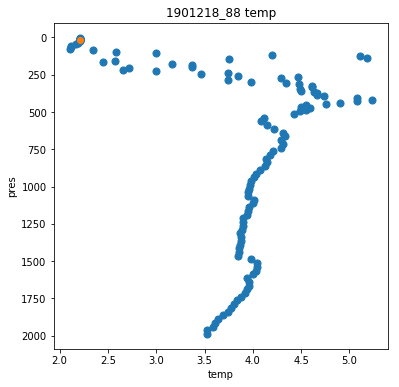

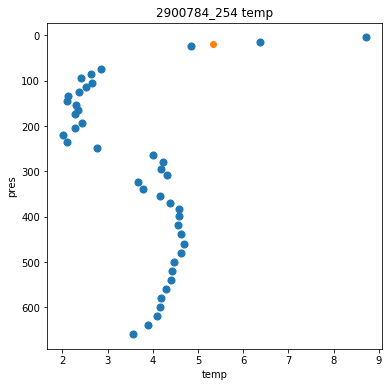

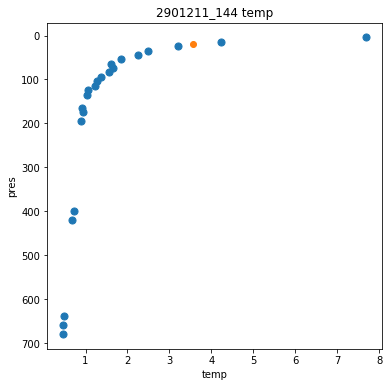

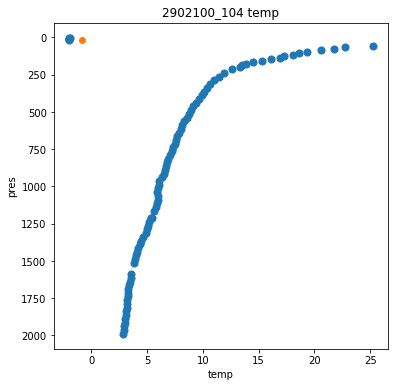

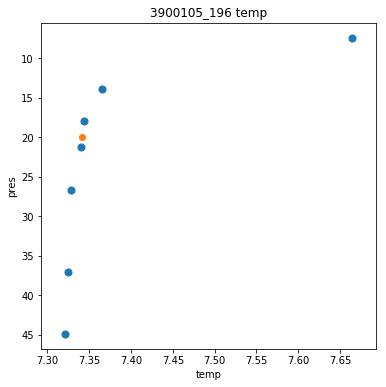

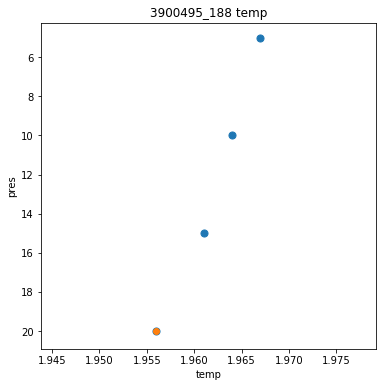

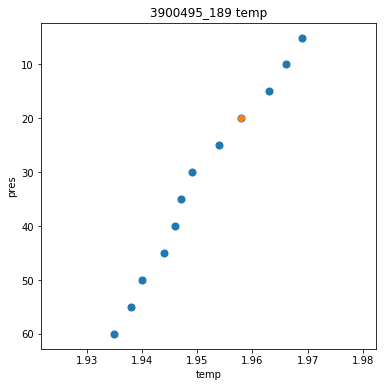

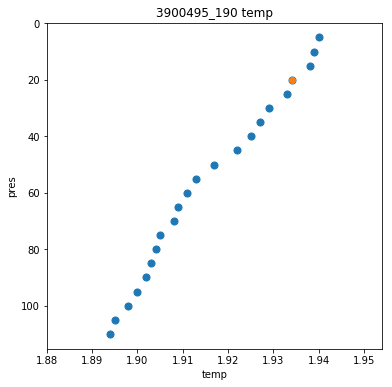

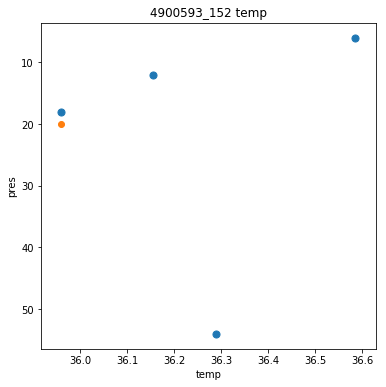

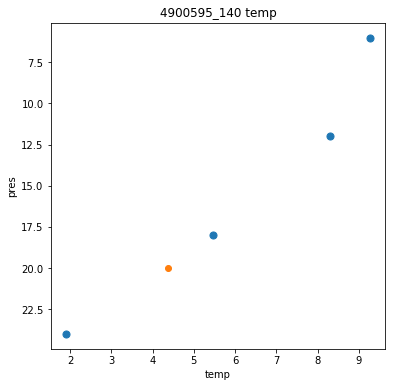

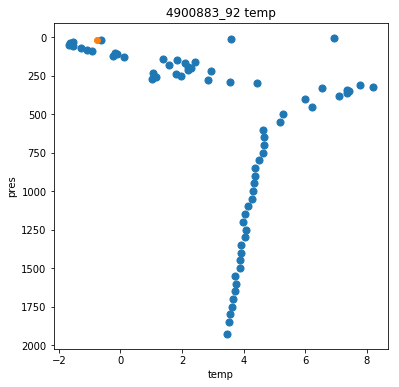

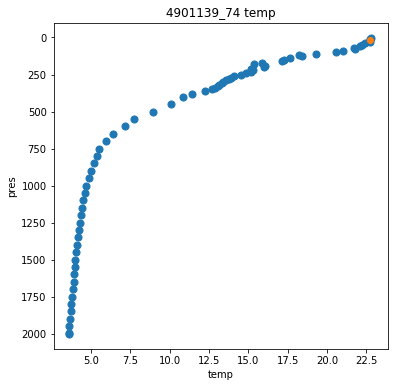

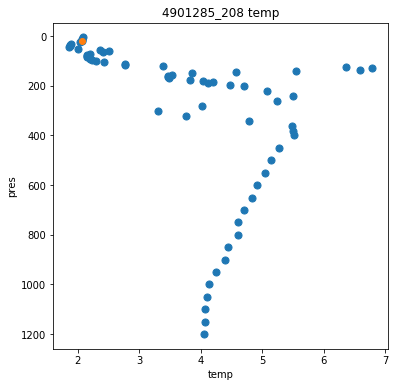

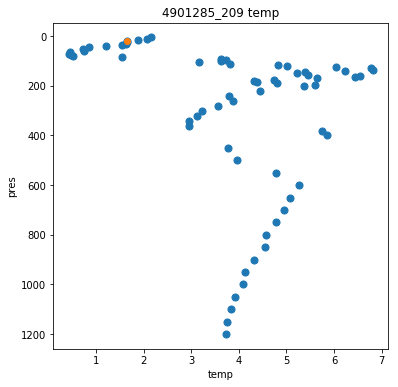

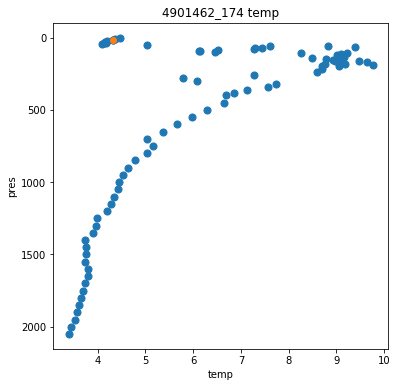

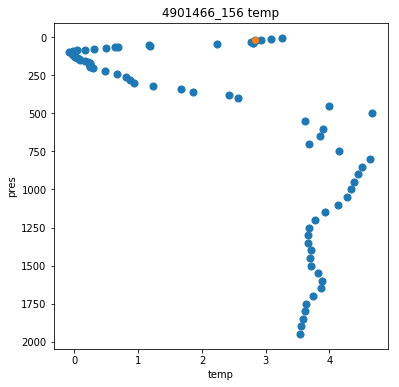

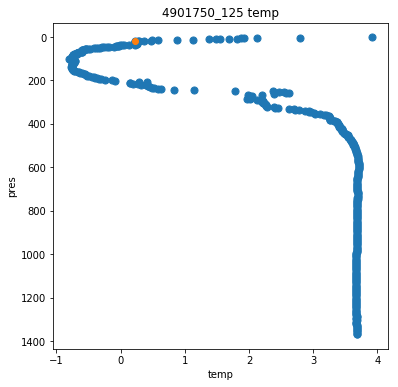

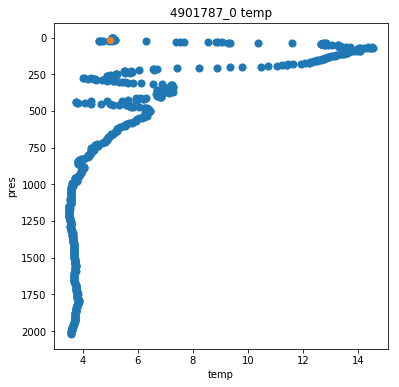

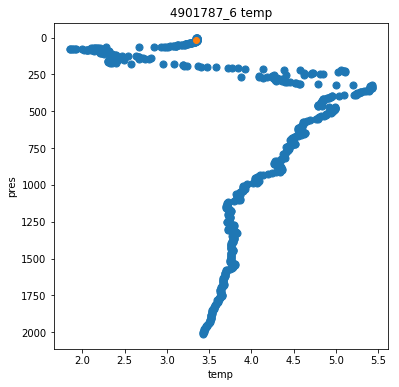

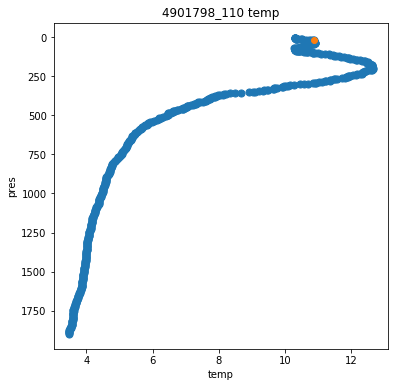

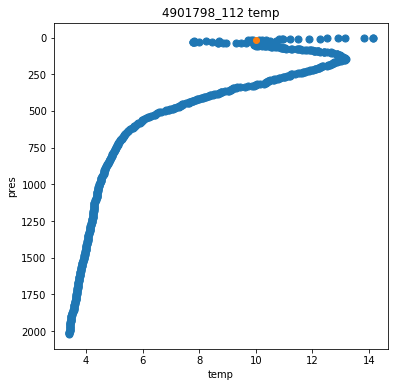

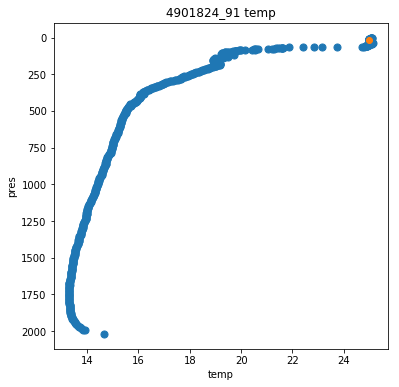

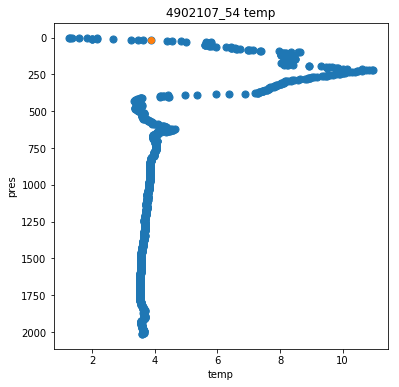

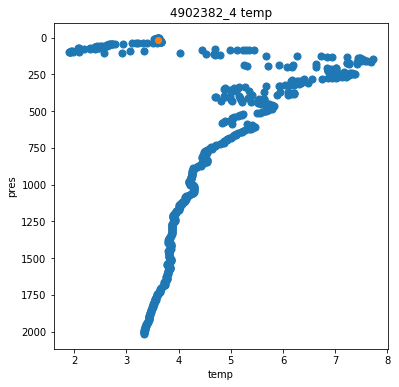

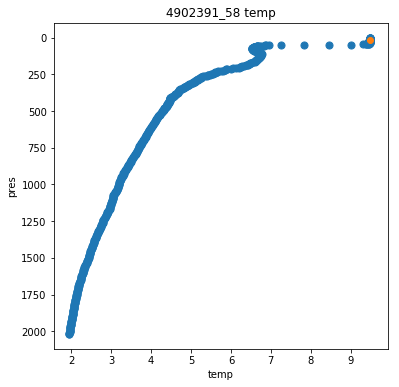

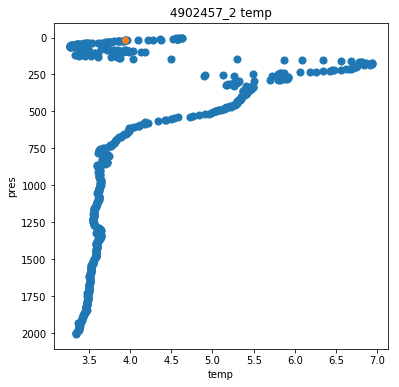

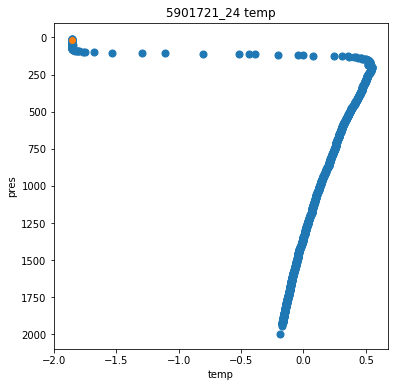

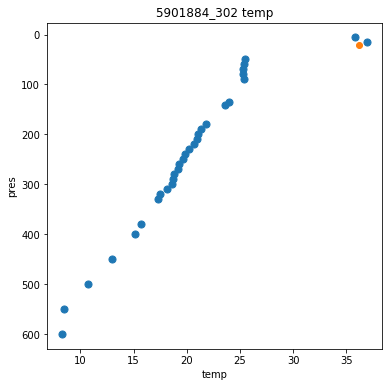

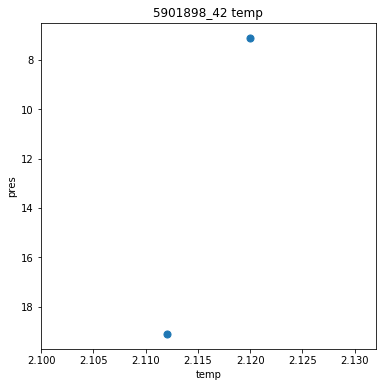

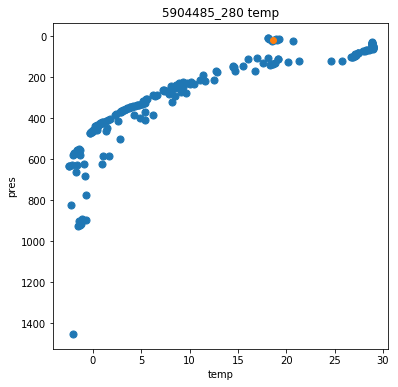

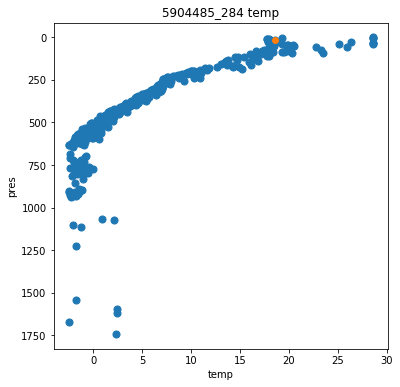

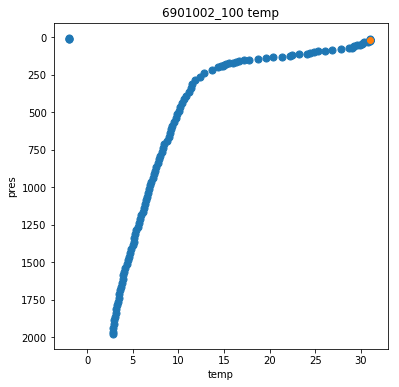

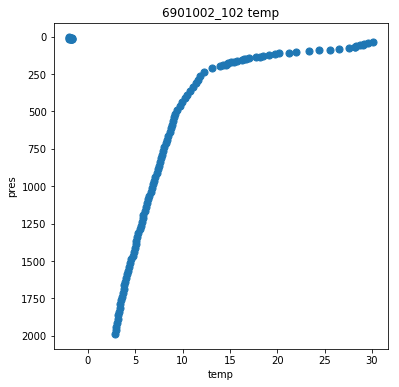

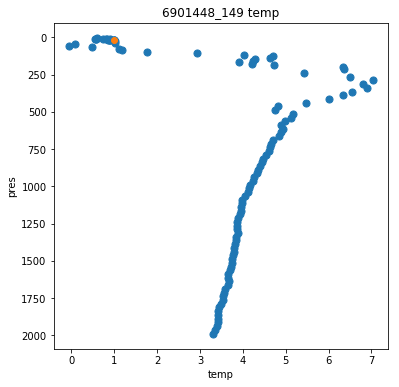

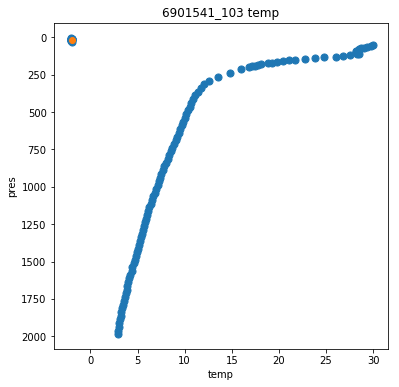

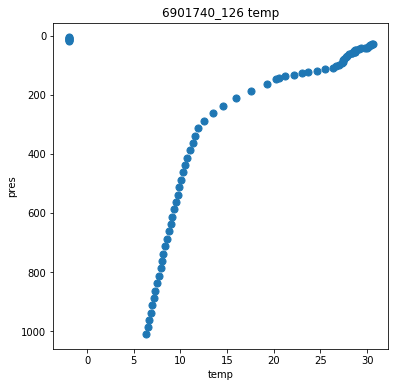

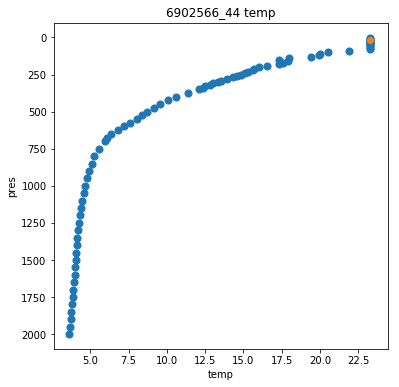

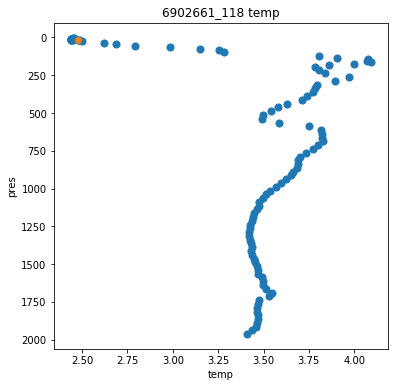

In [12]:
for profile_id, df in selectionDf.groupby('profile_id'):
    #fig.subplots_adjust(hspace=.35, wspace=.35)
    pdf = iDf[iDf['profile_id'] == profile_id]
    if pdf.empty:
        continue
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6,6))
    ax = vp.plot_scatter(df, profile_id, 'temp', 'pres', axes)
    ax.scatter(pdf.temp.iloc[0], pdf.pres.iloc[0])

In [13]:
for row in iDf.itertuples():
    coord = {}
    coord['lat'] = row.lat
    coord['long'] = row.lon
    startDate = datetime.strftime(row.date - timedelta(days=15), '%Y-%m-%d')
    endDate = datetime.strftime(row.date + timedelta(days=15), '%Y-%m-%d')
    shape = vp.construct_box(coord, 5, 5)
    vp.build_selection_page_url(startDate, endDate, shape, presRange)

https://argovis.colorado.edu/selection/profiles/devpage?startDate=2013-12-01&endDate=2013-12-31&shape=[[[-48.76799999999997,44.781],[-53.76799999999997,44.781],[-53.76799999999997,39.781],[-48.76799999999997,39.781],[-48.76799999999997,44.781]]]&presRange=[15,35]
https://argovis.colorado.edu/selection/profiles/devpage?startDate=2013-05-14&endDate=2013-06-13&shape=[[[144.635,39.46],[139.635,39.46],[139.635,34.46],[144.635,34.46],[144.635,39.46]]]&presRange=[15,35]
https://argovis.colorado.edu/selection/profiles/devpage?startDate=2012-09-03&endDate=2012-10-03&shape=[[[132.702,41.647],[127.702,41.647],[127.702,36.647],[132.702,36.647],[132.702,41.647]]]&presRange=[15,35]
https://argovis.colorado.edu/selection/profiles/devpage?startDate=2016-04-25&endDate=2016-05-25&shape=[[[68.255,-4.614],[63.254999999999995,-4.614],[63.254999999999995,-9.614],[68.255,-9.614],[68.255,-4.614]]]&presRange=[15,35]
https://argovis.colorado.edu/selection/profiles/devpage?startDate=2008-08-31&endDate=2008-09-30